# Lab 6
* **Name**: Utkarsh Prakash

## Title
Demostrate the working principle of multi-layer feedforward network.

## Objective
* To observe the working multi-layer feedforward network with non-linearly separable and non-convex data.
* To understand the problem of vanishing and exploding gradients and solve it using ReLU activation function.

## Hypothesis:
* Two layer neural network (i.e. one output layer) should not be able to classify non-linearly separable data. This problem can be solved using 3 layer neural network with sigmoid activation function.
* Three layer neural network should not be able to classify non-convex data. This problem can be solved using 4 layer neural network with sigmoid activation function.
* With sigmoid activation function the network should suffer from the problem of vanishing/exploding gradients. This should be resolved using ReLU activation function.

## Experimental Description:
1. **Data Generation:** 

   We generate synthetic data for training and testing.


2. **Operations:**

   Let $X$ represents the matrix of training examples where each training example is stacked as a column of the matrix. Let $y$ represent the desired output of the network $y'$ the actual output of the network.

   The error between the desired output vectors $(y)$ and the actual output vectors $(y')$ is given as follows:

   <center> $E = \frac{1}{m} ||y - y'||_{2}^{2}$ </center>
   
   **Three Layer Neural Network**
   
   Forward Propagation:
   
   <center> $z^{[1]} = W^{[1]}X + b^{[1]}$ </center>
   <center> $a^{[1]} = \sigma(z^{[1]})$ </center>
   <center> $z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}$ </center>
   <center> $a^{[2]} = \sigma(z^{[2]})$ </center>
   
   
    Backward Propagation:
   
   <center> $ \frac{\partial L}{\partial z^{[2]}}  = (a^{[2]}-y)*(a^{[2]})*(1-a^{[2]}) $ </center>
   
   
   <center> $ \frac{\partial L}{\partial w^{[2]}} = \frac{\partial L}{\partial z^{[2]}} (a^{[1]})^T $ </center>
   
   
   <center> $ \frac{\partial L}{\partial b^{[2]}} = \frac{\partial L}{\partial z^{[2]}} $ </center>
   
   
   <center> $ \frac{\partial L}{\partial z^{[1]}} = (W^{[2]})^T\frac{\partial L}{\partial z^{[2]}}*a^{[1]}*(1-a^{[1]}) $ </center>
   
   
   <center> $ \frac{\partial L}{\partial w^{[1]}} = \frac{\partial L}{\partial z^{[1]}} (X)^T $ </center>
   
   
   <center> $ \frac{\partial L}{\partial b^{[1]}} = \frac{\partial L}{\partial z^{[1]}} $ </center>
      
   **Four Layer Neural Network**
   
   Forward Propagation:
   
   <center> $z^{[1]} = W^{[1]}X + b^{[1]}$ </center>
   <center> $a^{[1]} = \sigma(z^{[1]})$ </center>
   <center> $z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}$ </center>
   <center> $a^{[2]} = \sigma(z^{[2]})$ </center>
   <center> $z^{[3]} = W^{[3]}a^{[2]} + b^{[3]}$ </center>
   <center> $a^{[3]} = \sigma(z^{[3]})$ </center>
   
   Backward Propagation:
   
   <center> $ \frac{\partial L}{\partial z^{[3]}} = -(y - a^{[3]})*(a^{[3]})*(1-a^{[3]}) $ </center>
   
   
   <center> $ \frac{\partial L}{\partial w^{[3]}} = \frac{\partial L}{\partial z^{[3]}} (a^{[2]})^T $ </center>
   
   
   <center> $ \frac{\partial L}{\partial b^{[3]}} = \frac{\partial L}{\partial z^{[3]}} $ </center>
   
   
   <center> $ \frac{\partial L}{\partial z^{[2]}} = (W^{[3]})^T\frac{\partial L}{\partial z^{[3]}}*a^{[2]}*(1-a^{[2]}) $ </center>
   
   
   <center> $ \frac{\partial L}{\partial w^{[2]}} = \frac{\partial L}{\partial z^{[2]}} (a^{[2]})^T $ </center>
   
   
   <center> $ \frac{\partial L}{\partial b^{[2]}} = \frac{\partial L}{\partial z^{[2]}} $ </center>
   
   <center> $ \frac{\partial L}{\partial z^{[1]}} = (W^{[2]})^T\frac{\partial L}{\partial z^{[2]}}*a^{[1]}*(1-a^{[1]}) $ </center>
   
   
   <center> $ \frac{\partial L}{\partial w^{[1]}} = \frac{\partial L}{\partial z^{[1]}} (X)^T $ </center>
   
   
   <center> $ \frac{\partial L}{\partial b^{[1]}} = \frac{\partial L}{\partial z^{[1]}} $ </center>
   
   **Sigmoid Activation Function**
   <center> $ \sigma(z) = \frac{1}{1+ \exp(-z)} $ </center>
   
   **ReLU Activation Function**
   <center> $ ReLU(z) = max(z, 0) $ </center>
   
3. **Training:**

    During training we first do forward propagation and then do backpropagation to find the derivatives of weights and biases. This is done several times.
    
4. **Testing**
    During testing we perform the forward propagation. The predicted labels are:
    <center> $ y' = 1 $ if $ a^{[L]} >= 0.5 $ </center>
    <center> $ y' = 0 $ if $ a^{[L]} < 0.5 $ </center>
    
    where $a^{[L]}$ is the output of the network.
    
## Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part 1: Non Linearly Separable Data

In [2]:
m = 4000                            # Number of training examples

mean1 = np.array([0, 0])            # Mean for class 1
mean2 = np.array([10, 10])          # Mean for class 2
mean3 = np.array([0, 20])           # Mean for class 1
mean4 = np.array([-10, 10])         # Mean for class 2

covariance = np.eye(2)              # Identity covariance matrix

class_1 = np.random.multivariate_normal(mean1, covariance, m//4)    # Class 1 samples
class_2 = np.random.multivariate_normal(mean2, covariance, m//4)    # Class 2 samples
class_3 = np.random.multivariate_normal(mean3, covariance, m//4)    # Class 1 samples
class_4 = np.random.multivariate_normal(mean4, covariance, m//4)    # Class 2 samples

y1 = np.zeros(m//4)      # Class 1 labels
y2 = np.ones(m//4)       # Class 2 labels
y3 = np.zeros(m//4)       # Class 1 labels
y4 = np.ones(m//4)       # Class 2 labels

X = np.concatenate((class_1, class_2, class_3, class_4), axis=0).T   # Train data

y = np.expand_dims(np.concatenate((y1, y2, y3, y4), axis=0), axis=-1).T    # Train labels

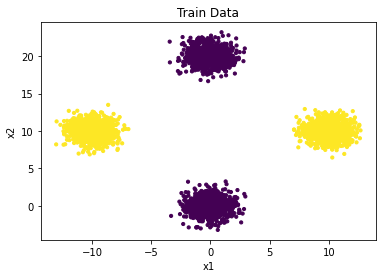

In [3]:
# Plotting Train Data
plt.figure()
plt.scatter(X[0, :], X[1, :], c=y, s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Train Data')
plt.show()

In [4]:
print("Shape of the input vectors:", X.shape)
print("Shape of the output vectors:", y.shape)

Shape of the input vectors: (2, 4000)
Shape of the output vectors: (1, 4000)


#### Perceptron Model

In [6]:
def MissClassificationError(X, y, w):
    '''
        This function calculates the fraction of examples
        misclassified by the perceptron.
    '''
    activation = np.dot(X, w)             # activation value
    y_pred = np.where(activation > 0, 1, 0) # output value
    
    return np.sum((y != y_pred).any(axis=1), axis=0)/X.shape[0]   # error calculation

In [5]:
def PerceptronLearningBatch(X, y, learning_rate=0.01, epochs=1000):
    '''
        This function implements the Perceptron Learning Law using
        Batch update.
    '''
    errors = []          # List for storing errors

    w=np.random.uniform(0,1,(X.shape[1],y.shape[1]))   # Weight initialisation
    
    for i in range(epochs):
        activation = np.dot(X, w)                # activation value
        output = np.where(activation > 0, 1, 0)  # output value

        error = y - output                 # error

        gradient = (learning_rate*np.dot(X.T, error))/(2*X.shape[0])     # gradient calculation

        w = w + gradient                  # weight update
        
        # Error calculation 
        error = MissClassificationError(X, y, w)
        errors.append(MissClassificationError(X, y, w))
        
        # Early stopping
        if np.linalg.norm(gradient)<= 10**(-10):
            break
            
    return w, errors

In [7]:
w, errors = PerceptronLearningBatch(X.T, y.T, learning_rate=0.01, epochs=1000)  # Learning weights

In [12]:
accuracy = 1-MissClassificationError(X.T, y.T, w)
print("Accuracy of the perceptron model is:", accuracy)

Accuracy of the perceptron model is: 0.37375


#### Three Layer Neural Network (One Hidden Layer)

In [52]:
def sigmoid(z):
    '''
        This function calculates the sigmoid function of z.
    '''
    return 1/(1 + np.exp(-z))

In [51]:
def mean_squared_error(X, y, W, b, forward_prop):
    '''
        This function calculates the mean squared error.
    '''
    z, a = forward_prop(X, W, b)        # Performing the forward pass
    
    return np.sum((y - a["a" + str(len(W))])**2)/X.shape[1]    # Error calculation

In [50]:
def init_weights(num_layers, units):
    '''
        This function initializes weights and biases for each of the 
        layer of the network
    '''
    W = {}     # Weight dictionary
    b = {}     # Bias dictionary
    
    # Iterating over the layers
    for i in range(num_layers):
        W["w" + str(i+1)] = np.random.randn(units[i+1], units[i])           # Weight initialization
        b["b" + str(i+1)] = np.expand_dims(np.zeros(units[i+1]), axis= -1)  # Bias initialization 
        
    return W, b

**Forward Propagation:**
   
<center> $z^{[1]} = W^{[1]}X + b^{[1]}$ </center>
<center> $a^{[1]} = \sigma(z^{[1]})$ </center>
<center> $z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}$ </center>
<center> $a^{[2]} = \sigma(z^{[2]})$ </center>

In [54]:
def forward_propagation_one_hidden(X, W, b):
    '''
        This function implements the forward propagation
        for a three layer neural network (one hidden layer).
    '''
    z = {}      # Activation value dictionary
    a = {}      # Output value dictionary
    
    # First Layer 
    z["z1"] = np.dot(W["w1"], X) + b["b1"]        # z1 calculation
    a["a1"] = sigmoid(z["z1"])                    # a1 calculation
    
    # Second Layer
    z["z2"] = np.dot(W["w2"], a["a1"]) + b["b2"]  # z2 calculation
    a["a2"] = sigmoid(z["z2"])                    # a2 calculation
    
    return z, a

**Backward Propagation:**
   
<center> $ \frac{\partial L}{\partial z^{[2]}} = -(y - a^{[2]})*(a^{[2]})*(1-a^{[2]}) $ </center>


<center> $ \frac{\partial L}{\partial w^{[2]}} = \frac{\partial L}{\partial z^{[2]}} (a^{[1]})^T $ </center>


<center> $ \frac{\partial L}{\partial b^{[2]}} = \frac{\partial L}{\partial z^{[2]}} $ </center>


<center> $ \frac{\partial L}{\partial z^{[1]}} = (W^{[2]})^T\frac{\partial L}{\partial z^{[2]}}*a^{[1]}*(1-a^{[1]}) $ </center>


<center> $ \frac{\partial L}{\partial w^{[1]}} = \frac{\partial L}{\partial z^{[1]}} (X)^T $ </center>


<center> $ \frac{\partial L}{\partial b^{[1]}} = \frac{\partial L}{\partial z^{[1]}} $ </center>

In [55]:
def backpropagation_one_hidden(X, y, W, b, z, a):
    '''
        This function implements the backpropagation for
        three layer neural network (one hidden layer).
    '''
    dW = {}               # Weight derivative dictionary
    db = {}               # Bias derivative dictionary
    dZ = {}               # Activation derivation dictionary
    da = {}               # Output derivation dictionary
    
    # Second Layer
    dZ["dz2"] = -1*(y-a["a2"])*a["a2"]*(1-a["a2"])                # dz2 calculation
    dW["dw2"] = np.dot(dZ["dz2"], a["a1"].T)/X.shape[1]           # dw2 calculation
    db["db2"] = np.expand_dims(np.sum(dZ["dz2"], axis=1), axis=-1)/X.shape[1]   # db2 calculation
    
    # First Layer
    dZ["dz1"] = np.dot(W["w2"].T, dZ["dz2"])*a["a1"]*(1-a["a1"])  # dz1 calculation
    dW["dw1"] = np.dot(dZ["dz1"], X.T)/X.shape[1]                 # dw1 calculation
    db["db1"] = np.expand_dims(np.sum(dZ["dz1"], axis=1), axis=-1)/X.shape[1]  # db1 calculation
    
    return dW, db

In [58]:
def one_hidden_layer_model(X, y, units, num_iterations=1000, learning_rate=0.01):
    '''
        This function implements a three layer neural 
        network (one hidden layer).
    '''
    errors = []                       # List for storing errors
    W, b = init_weights(2, units)     # Weight initialisation
    
    # Epochs
    for i in range(num_iterations):
        z, a = forward_propagation_one_hidden(X, W, b)         # Forward pass
        
        dW, db = backpropagation_one_hidden(X, y, W, b, z, a)  # Backward pass
        
        # Weight Update for each layer
        for j in range(1, len(dW)+1):
            W["w" + str(j)] = W["w" + str(j)] - learning_rate*dW["dw" + str(j)]   # Weight update
            b["b" + str(j)] = b["b" + str(j)] - learning_rate*db["db" + str(j)]   # Bias update
            
        errors.append(mean_squared_error(X, y, W, b, forward_propagation_one_hidden))   # Error calculation
        
        # Early stopping
        if i > 2 and (errors[i-1] - errors[i]) < 10**(-20):
            break
    
    return errors, W, b

In [63]:
n0 = X.shape[0]     # Units in Input Layer
n1 = 2              # Units in Hidden Layer
n2 = 1              # Units in Output Layer
errors, W, b = one_hidden_layer_model(X, y, [n0, n1, n2], learning_rate=1)   # Weight Calculation

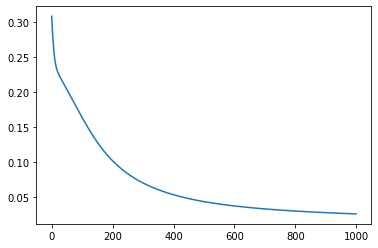

In [64]:
plt.figure()
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs")
plt.show()

In [23]:
z, a = forward_propagation_one_hidden(X, W, b)
y_pred = (a["a2"] > 0.5).astype(np.int32)
accuracy = 1 - np.sum((y_pred - y)**2)/X.shape[1] 
print("Accuracy of the three layer neural network is:", accuracy)

Accuracy of the three layer neural network is: 1.0


### Part 2: Non Convex Data

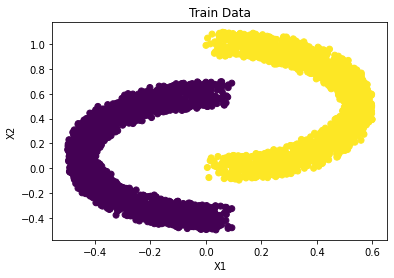

In [62]:
m = 4000
theta = np.linspace(np.pi/2, 1.5*np.pi, m//2)            # Range of theta values
radius = 0.5
a = radius*np.cos(theta) + 0.1*np.random.rand(len(theta)) # X-coordinate
b = radius*np.sin(theta) + 0.2*np.random.rand(len(theta)) # y-coordinate
a = np.expand_dims(a, axis=-1).T
b = np.expand_dims(b, axis=-1).T

theta1 = np.linspace(-0.5*np.pi, 0.5*np.pi, m//2)                  # Range of theta values 
c = radius*np.cos(theta1) + 0.1*np.random.rand(len(theta1))        # X-coordinate
d = 0.4 + radius*np.sin(theta1) + 0.2*np.random.rand(len(theta1))  # y-coordinate
c = np.expand_dims(c, axis=-1).T
d = np.expand_dims(d, axis=-1).T

class_1 = np.concatenate([a, b], axis=0)
class_2 = np.concatenate([c, d], axis=0)
X = np.c_[class_1, class_2]      # Train data
y = np.c_[np.zeros((1, class_1.shape[1])), np.ones((1, class_2.shape[1]))]  # Train labels

# Plotting Train Data
plt.figure()
plt.scatter(X[0, :], X[1, :], c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Train Data")
plt.show()

#### Three Layer Neural Network (One Hidden Layer)

In [65]:
n0 = X.shape[0]            # Units in Input Layer
n1 = 2                     # Units in Hidden Layer
n2 = 1                     # Units in Output Layer
errors, W, b = one_hidden_layer_model(X, y, [n0, n1, n2], learning_rate=0.01)    # Weight calculation

In [27]:
z, a = forward_propagation_one_hidden(X, W, b)
y_pred = (a["a2"] > 0.5).astype(np.int32)
accuracy = 1 - np.sum((y_pred - y)**2)/X.shape[1] 
print("Accuracy of the three layer neural network is:", accuracy)

Accuracy of the three layer neural network is: 0.40025


#### Four Layer Neural Network (Two Hidden Layers)

**Forward Propagation:**
   
<center> $z^{[1]} = W^{[1]}X + b^{[1]}$ </center>
<center> $a^{[1]} = \sigma(z^{[1]})$ </center>
<center> $z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}$ </center>
<center> $a^{[2]} = \sigma(z^{[2]})$ </center>
<center> $z^{[3]} = W^{[3]}a^{[2]} + b^{[3]}$ </center>
<center> $a^{[3]} = \sigma(z^{[3]})$ </center>

In [66]:
def forward_propagation_two_hidden(X, W, b):
    '''
        This function implements the forward propagation
        for a four layer neural network (two hidden layers).
    '''
    z = {}            # Activation value dictionary
    a = {}            # Output value dictionary
    
    # First Layer
    z["z1"] = np.dot(W["w1"], X) + b["b1"]            # z1 calculation
    a["a1"] = sigmoid(z["z1"])                        # a1 calculation
    
    # Second Layer
    z["z2"] = np.dot(W["w2"], a["a1"]) + b["b2"]      # z2 calculation
    a["a2"] = sigmoid(z["z2"])                        # a2 calculation
    
    # Third Layer
    z["z3"] = np.dot(W["w3"], a["a2"]) + b["b3"]      # z3 calculation
    a["a3"] = sigmoid(z["z3"])                        # a3 calculation
    
    return z, a

**Backward Propagation:**
   
<center> $ \frac{\partial L}{\partial z^{[3]}} = -(y - a^{[3]})*(a^{[3]})*(1-a^{[3]}) $ </center>


<center> $ \frac{\partial L}{\partial w^{[3]}} = \frac{\partial L}{\partial z^{[3]}} (a^{[2]})^T $ </center>


<center> $ \frac{\partial L}{\partial b^{[3]}} = \frac{\partial L}{\partial z^{[3]}} $ </center>


<center> $ \frac{\partial L}{\partial z^{[2]}} = (W^{[3]})^T\frac{\partial L}{\partial z^{[3]}}*a^{[2]}*(1-a^{[2]}) $ </center>


<center> $ \frac{\partial L}{\partial w^{[2]}} = \frac{\partial L}{\partial z^{[2]}} (a^{[2]})^T $ </center>


<center> $ \frac{\partial L}{\partial b^{[2]}} = \frac{\partial L}{\partial z^{[2]}} $ </center>

<center> $ \frac{\partial L}{\partial z^{[1]}} = (W^{[2]})^T\frac{\partial L}{\partial z^{[2]}}*a^{[1]}*(1-a^{[1]}) $ </center>


<center> $ \frac{\partial L}{\partial w^{[1]}} = \frac{\partial L}{\partial z^{[1]}} (X)^T $ </center>


<center> $ \frac{\partial L}{\partial b^{[1]}} = \frac{\partial L}{\partial z^{[1]}} $ </center>

In [68]:
def backpropagation_two_hidden(X, y, W, b, z, a):
    '''
        This function implements the backpropagation for
        four layer neural network (two hidden layers).
    '''
    dW = {}               # Weight derivative dictionary
    db = {}               # Bias derivative dictionary
    dZ = {}               # Activation derivation dictionary
    da = {}               # Output derivation dictionary
    
    # Third Layer
    dZ["dz3"] = -1*(y-a["a3"])*a["a3"]*(1-a["a3"])              # dz3 calculation
    dW["dw3"] = np.dot(dZ["dz3"], a["a2"].T)/X.shape[1]         # dw3 calculation
    db["db3"] = np.expand_dims(np.sum(dZ["dz3"], axis=1), axis=-1)/X.shape[1]    # db3 calculation
    
    # Second Layer
    dZ["dz2"] = np.dot(W["w3"].T, dZ["dz3"])*a["a2"]*(1-a["a2"])     # dz2 calculation
    dW["dw2"] = np.dot(dZ["dz2"], a["a1"].T)/X.shape[1]              # dw2 calculation
    db["db2"] = np.expand_dims(np.sum(dZ["dz2"], axis=1), axis=-1)/X.shape[1]    # db2 calculation
    
    # First Layer
    dZ["dz1"] = np.dot(W["w2"].T, dZ["dz2"])*a["a1"]*(1-a["a1"])     # dz1 calculation
    dW["dw1"] = np.dot(dZ["dz1"], X.T)/X.shape[1]                    # dw1 calculation
    db["db1"] = np.expand_dims(np.sum(dZ["dz1"], axis=1), axis=-1)/X.shape[1]    # db1 calculation
    
    return dW, db

In [69]:
def two_hidden_layer_model(X, y, units, num_iterations=1000, learning_rate=0.01):
    '''
        This function implements a four layer neural 
        network (two hidden layers).
    '''
    errors = []             # List for storing errors
    W, b = init_weights(3, units)     # Weight initialization
    
    # Epochs
    for i in range(num_iterations):
        z, a = forward_propagation_two_hidden(X, W, b)         # Forward Propagation
        
        dW, db = backpropagation_two_hidden(X, y, W, b, z, a)  # Backward Propagation
        
        # Weight update for each layer
        for j in range(1, len(dW)+1):
            W["w" + str(j)] = W["w" + str(j)] - learning_rate*dW["dw" + str(j)]    # Weight update
            b["b" + str(j)] = b["b" + str(j)] - learning_rate*db["db" + str(j)]    # Bias update
            
        errors.append(mean_squared_error(X, y, W, b, forward_propagation_two_hidden))    # Error calculation
        
        # Early stopping
        if i > 2 and (errors[i-1] - errors[i]) < 10**(-20):
            break
    
    return errors, W, b, dW, db

In [70]:
n0 = X.shape[0]             # Units in Input Layer
n1 = 4                      # Units in Hidden Layer 1
n2 = 2                      # Units in Hidden Layer 2
n3 = 1                      # Units in Output Layer
errors, W, b, dW, db = two_hidden_layer_model(X, y, [n0, n1, n2, n3], learning_rate=1, num_iterations=2000) # Weight calculation

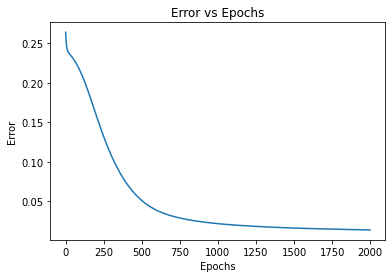

In [71]:
plt.figure()
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs")
plt.show()

In [72]:
z, a = forward_propagation_two_hidden(X, W, b)
y_pred = (a["a3"] > 0.5).astype(np.int32)
accuracy = 1 - np.sum((y_pred - y)**2)/X.shape[1]
print("The accuracy of four layer neural network is:", accuracy)

The accuracy of four layer neural network is: 0.988


### Part 3: Vanishing/Exploding Gradients

In [39]:
W, b = init_weights(3, [n0, n1, n2, n3])
z, a = forward_propagation_two_hidden(X, W, b)
dW, db = backpropagation_two_hidden(X, y, W, b, z, a)

In [40]:
print("First Layer Derivative of Weights:")
print("---------------------------------")
print(dW["dw1"])
print()
print("Second Layer Derivative of Weights:")
print("---------------------------------")
print(dW["dw2"])
print()
print("Third Layer Derivative of Weights:")
print("---------------------------------")
print(dW["dw3"])

First Layer Derivative of Weights:
---------------------------------
[[ 4.63044786e-03  2.44330375e-03]
 [-1.25887241e-03 -6.90715225e-04]
 [ 3.67335806e-03  1.99496571e-03]
 [-1.77858116e-04 -6.61132529e-05]]

Second Layer Derivative of Weights:
---------------------------------
[[-0.00129734  0.00054467 -0.00191316 -0.00288637]
 [ 0.00278836 -0.00214778  0.00431913  0.00703607]]

Third Layer Derivative of Weights:
---------------------------------
[[0.00933389 0.00335446]]


#### ReLU activation function

In [73]:
def relu(z):
    '''
        This function calculates the ReLU function for z.
    '''
    return np.where(z > 0, z, 0)

In [74]:
def derivative_of_relu(z):
    '''
        This function calculates the derivative of ReLU
        activation function at z.
    '''
    return np.where(z > 0, 1, 0)

In [75]:
def forward_propagation_two_hidden(X, W, b):
    '''
        This function implements the forward propagation
        for a four layer neural network (two hidden layers).
    '''
    z = {}            # Activation value dictionary
    a = {}            # Output value dictionary
    
    # First Layer
    z["z1"] = np.dot(W["w1"], X) + b["b1"]            # z1 calculation
    a["a1"] = relu(z["z1"])                        # a1 calculation
    
    # Second Layer
    z["z2"] = np.dot(W["w2"], a["a1"]) + b["b2"]      # z2 calculation
    a["a2"] = relu(z["z2"])                        # a2 calculation
    
    # Third Layer
    z["z3"] = np.dot(W["w3"], a["a2"]) + b["b3"]      # z3 calculation
    a["a3"] = relu(z["z3"])                        # a3 calculation
    
    return z, a

In [76]:
def backpropagation_two_hidden(X, y, W, b, z, a):
    '''
        This function implements the backpropagation for
        four layer neural network (two hidden layers).
    '''
    dW = {}               # Weight derivative dictionary
    db = {}               # Bias derivative dictionary
    dZ = {}               # Activation derivation dictionary
    da = {}               # Output derivation dictionary
    
    # Third Layer
    dZ["dz3"] = -1*(y-a["a3"])*derivative_of_relu(a["a3"])              # dz3 calculation
    dW["dw3"] = np.dot(dZ["dz3"], a["a2"].T)/X.shape[1]         # dw3 calculation
    db["db3"] = np.expand_dims(np.sum(dZ["dz3"], axis=1), axis=-1)/X.shape[1]    # db3 calculation
    
    # Second Layer
    dZ["dz2"] = np.dot(W["w3"].T, dZ["dz3"])*derivative_of_relu(a["a2"])     # dz2 calculation
    dW["dw2"] = np.dot(dZ["dz2"], a["a1"].T)/X.shape[1]              # dw2 calculation
    db["db2"] = np.expand_dims(np.sum(dZ["dz2"], axis=1), axis=-1)/X.shape[1]    # db2 calculation
    
    # First Layer
    dZ["dz1"] = np.dot(W["w2"].T, dZ["dz2"])*derivative_of_relu(a["a1"])     # dz1 calculation
    dW["dw1"] = np.dot(dZ["dz1"], X.T)/X.shape[1]                    # dw1 calculation
    db["db1"] = np.expand_dims(np.sum(dZ["dz1"], axis=1), axis=-1)/X.shape[1]    # db1 calculation
    
    return dW, db

In [77]:
W, b = init_weights(3, [n0, n1, n2, n3])
z, a = forward_propagation_two_hidden(X, W, b)
dW, db = backpropagation_two_hidden(X, y, W, b, z, a)

In [49]:
print("First Layer Derivative of Weights:")
print("---------------------------------")
print(dW["dw1"])
print()
print("Second Layer Derivative of Weights:")
print("---------------------------------")
print(dW["dw2"])
print()
print("Third Layer Derivative of Weights:")
print("---------------------------------")
print(dW["dw3"])

First Layer Derivative of Weights:
---------------------------------
[[-0.04774032 -0.0420534 ]
 [ 0.0050646   0.00051374]
 [ 0.01572312  0.00034915]
 [-0.04050851 -0.01572142]]

Second Layer Derivative of Weights:
---------------------------------
[[ 0.04655267  0.          0.00387487  0.        ]
 [-0.0149993   0.04032888  0.00036626  0.09606803]]

Third Layer Derivative of Weights:
---------------------------------
[[-0.02075889  0.26848618]]


## Observations
| Input Data | Model | Accuarcy |
| --- | --- | --- |
| Non-Linearly Separable | Perceptron Model | 0.37375 |
| | Three Layer Neural Network | 1.0 |
| Non-Convex | Three Layer Neural Network | 0.40025 |
| | Four Layer Neural Network | 0.988 |

## Conclusion
* Two layer neural network (i.e. one output layer) is not able to classify non-linearly separable data. This problem can be solved using 3 layer neural network with sigmoid activation function.
* Three layer neural network is not able to classify non-convex data. This problem can be solved using 4 layer neural network with sigmoid activation function.
* As we increase the number of hidden layers in a neural network with sigmoid activation function, the network suffers from the problem of vanishing/exploding gradients. 
* The problem of vanishing/exploding gradients can be resolved using ReLU activation function. 

## References
1. Artificial Neural Networks, B. Yegnanaryana, 1999